<h1 style="font-size:40px; color:black; text-align:center; font-family:Calibri;">
Exploratory Data Analysis of Olympic Games
</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
df = pd.read_csv("dataset_olympics.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.shape

(70000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [6]:
df.describe(include=['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


In [7]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(383)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(69617, 15)

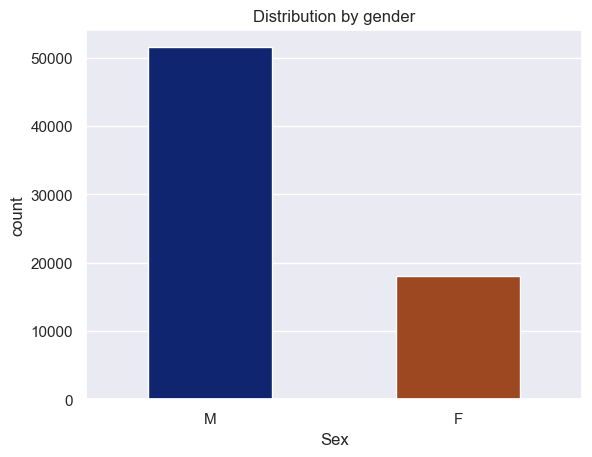

In [12]:
sns.set(style='darkgrid')
sns.countplot(x='Sex',data=df,width=0.5,palette='dark')
plt.title("Distribution by gender")
plt.show()

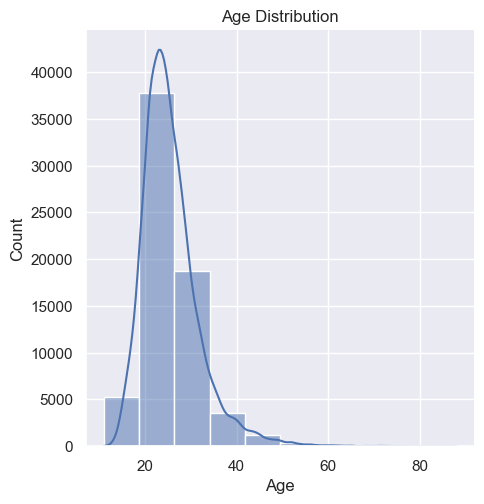

In [13]:
sns.displot(x='Age',data=df,bins=10,kde=True,color='b')
plt.title('Age Distribution')
plt.show()

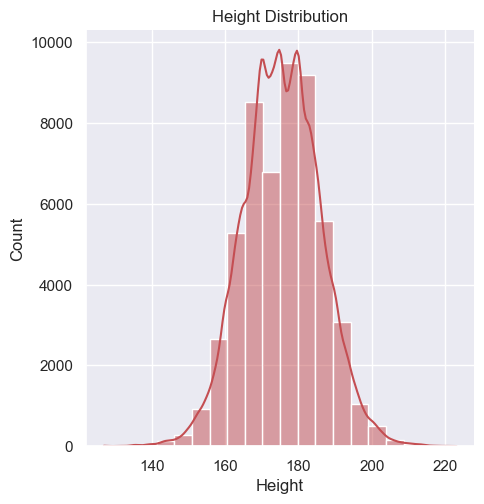

In [14]:
sns.displot(x='Height',data=df,bins=20,kde=True,color='r')
plt.title('Height Distribution')
plt.show()

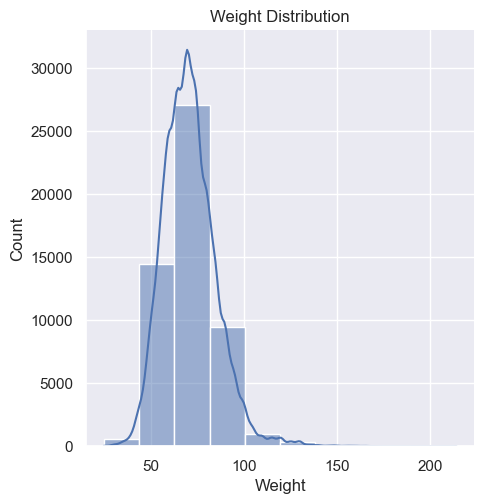

In [15]:
sns.displot(x='Weight',data=df,bins=10,kde=True,color='b')
plt.title('Weight Distribution')
plt.show()

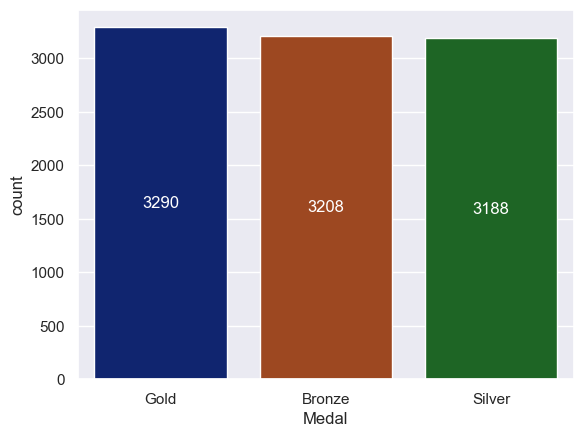

In [16]:
ax = sns.countplot(x='Medal',data=df,palette='dark')
sns.set(rc={"figure.figsize":(8,4)})
for bars in ax.containers:
    ax.bar_label(bars,label_type='center',color='white')

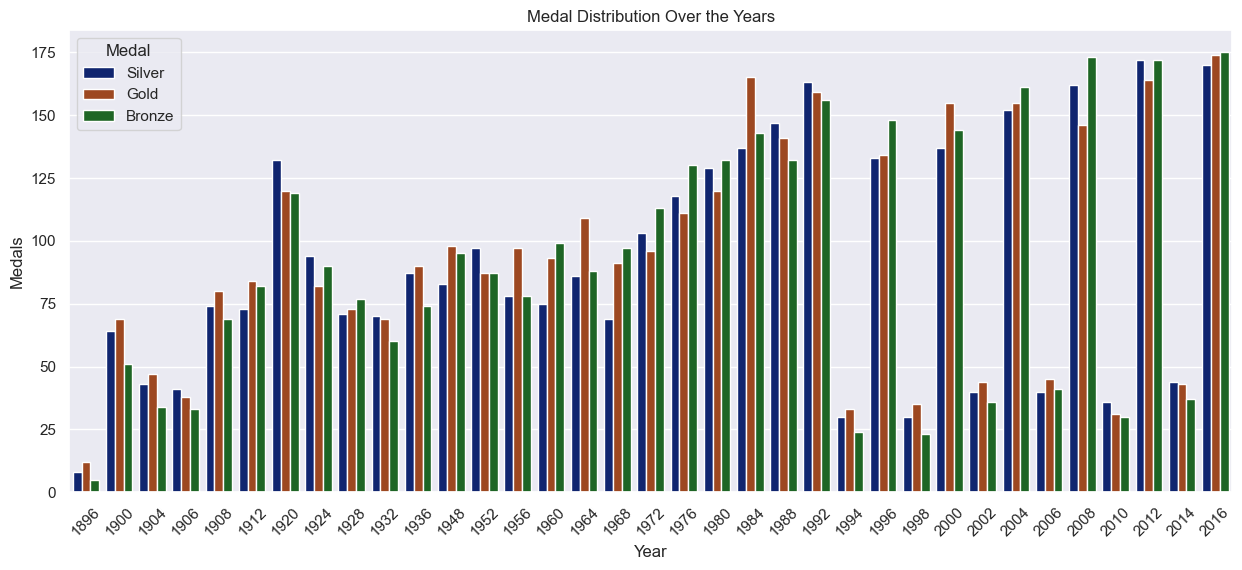

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Year',hue='Medal',palette='dark')
plt.title("Medal Distribution Over the Years")
plt.ylabel('Medals')
plt.xticks(rotation=45)
plt.show()

In [18]:
year_avg_age = df.groupby('Year')['Age'].mean()
year_avg_age

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64

In [19]:
sport_median_height = df.groupby('Sport')['Height'].median().sort_values(ascending=False)
sport_median_height

Sport
Basketball             190.0
Volleyball             187.5
Beach Volleyball       187.0
Rowing                 185.0
Water Polo             185.0
                       ...  
Military Ski Patrol      NaN
Motorboating             NaN
Polo                     NaN
Racquets                 NaN
Roque                    NaN
Name: Height, Length: 65, dtype: float64

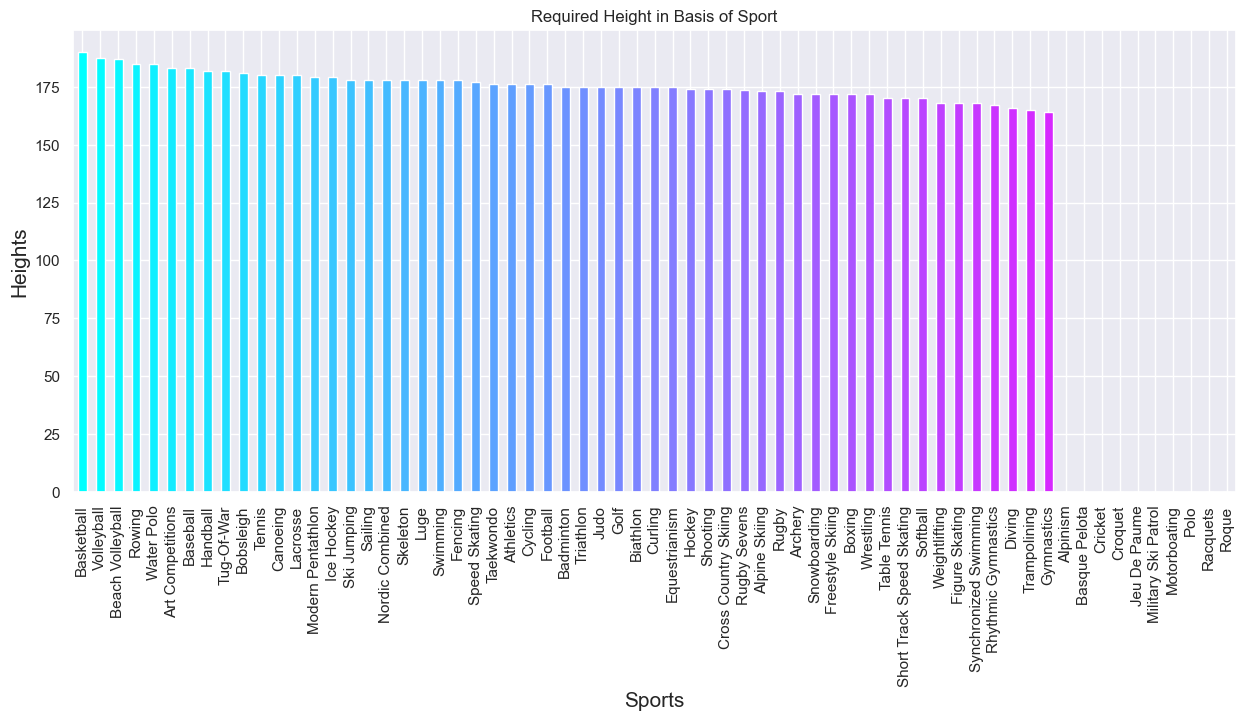

In [20]:
colors = cm.get_cmap('cool',len(sport_median_height))(np.arange(len(sport_median_height)))
ax = sport_median_height.plot(kind='bar',color=colors,figsize=(15,6))
ax.set_title("Required Height in Basis of Sport")
ax.set_xlabel("Sports",fontsize=15)
ax.set_ylabel("Heights",fontsize=15)
plt.show()

In [21]:
sport_median_height.min()

np.float64(164.0)

In [22]:
sport_median_height[sport_median_height == 164.0]

Sport
Gymnastics    164.0
Name: Height, dtype: float64

In [23]:
country_gender_count = df.groupby(['NOC','Sex'])['Sex'].count()
country_gender_count

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: Sex, Length: 432, dtype: int64

In [24]:
df['Medal'].value_counts()

Medal
Gold      3290
Bronze    3208
Silver    3188
Name: count, dtype: int64

In [25]:
country_gold_medals = df[df["Medal"] == "Gold"]
country_gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


In [26]:
country_gold_medals.groupby(['NOC'])['Medal'].count().sort_values(ascending=False)

NOC
USA    747
ITA    217
URS    216
GBR    210
FRA    184
      ... 
MGL      1
POR      1
THA      1
UAE      1
UGA      1
Name: Medal, Length: 84, dtype: int64

In [27]:
gold_medal = country_gold_medals.groupby(['NOC'])['Medal'].count().sort_values(ascending=False).head(20)

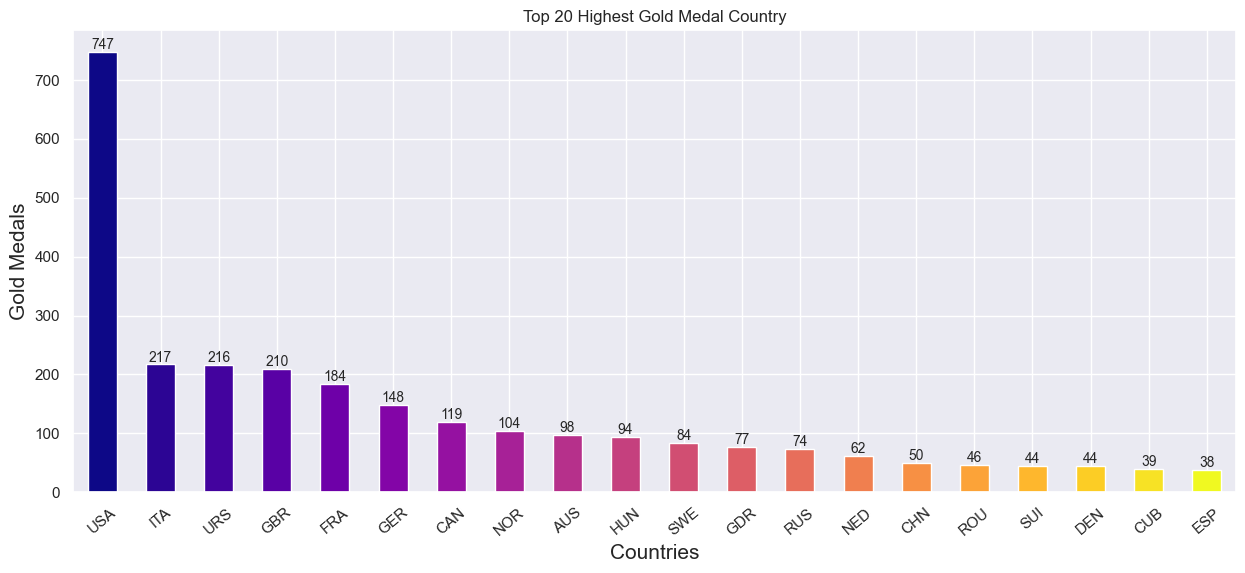

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
colors = cm.get_cmap('plasma', len(gold_medal))(np.arange(len(gold_medal)))
ax = gold_medal.plot(kind='bar', color=colors, figsize=(15,6))
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)
ax.set_title("Top 20 Highest Gold Medal Country")
ax.set_xlabel("Countries", fontsize=15)
ax.set_ylabel("Gold Medals", fontsize=15)
plt.xticks(rotation=40)
plt.show()

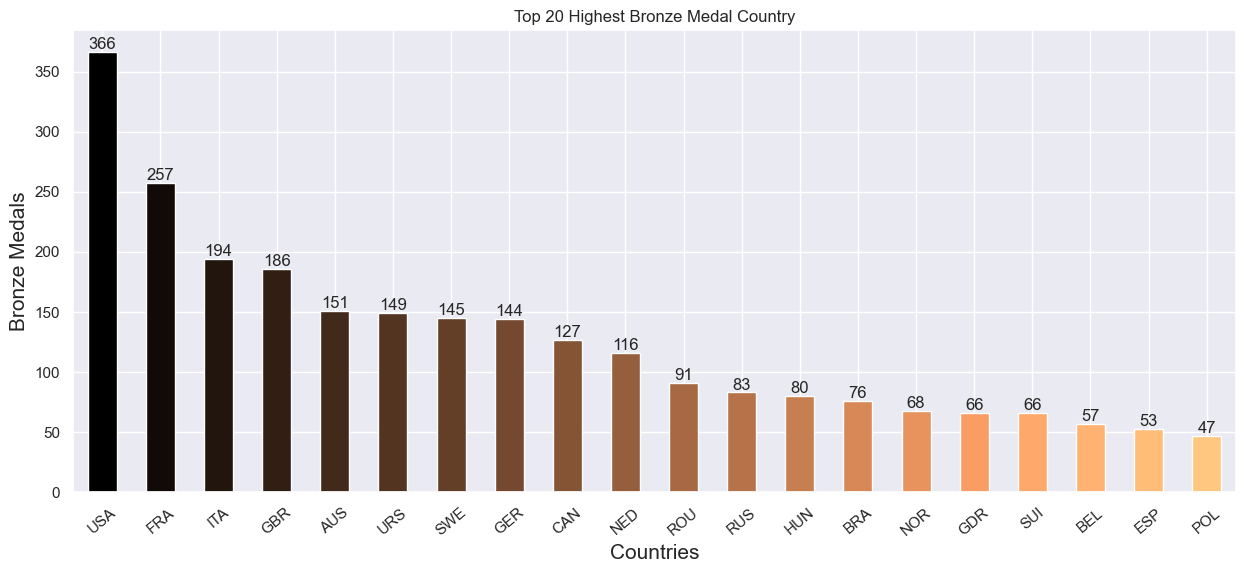

In [29]:
country_bronze_medals = df[df["Medal"] == "Bronze"]
bronze_medal = country_bronze_medals.groupby(['NOC'])['Medal'].count().sort_values(ascending=False).head(20)
colors = cm.get_cmap('copper',len(bronze_medal))(np.arange(len(bronze_medal)))
ax = bronze_medal.plot(kind='bar',color=colors,figsize=(15,6))
for contain in ax.containers:
    ax.bar_label(contain)
ax.set_title("Top 20 Highest Bronze Medal Country")
ax.set_xlabel("Countries",fontsize=15)
ax.set_ylabel("Bronze Medals",fontsize=15)
plt.xticks(rotation=40)
plt.show()

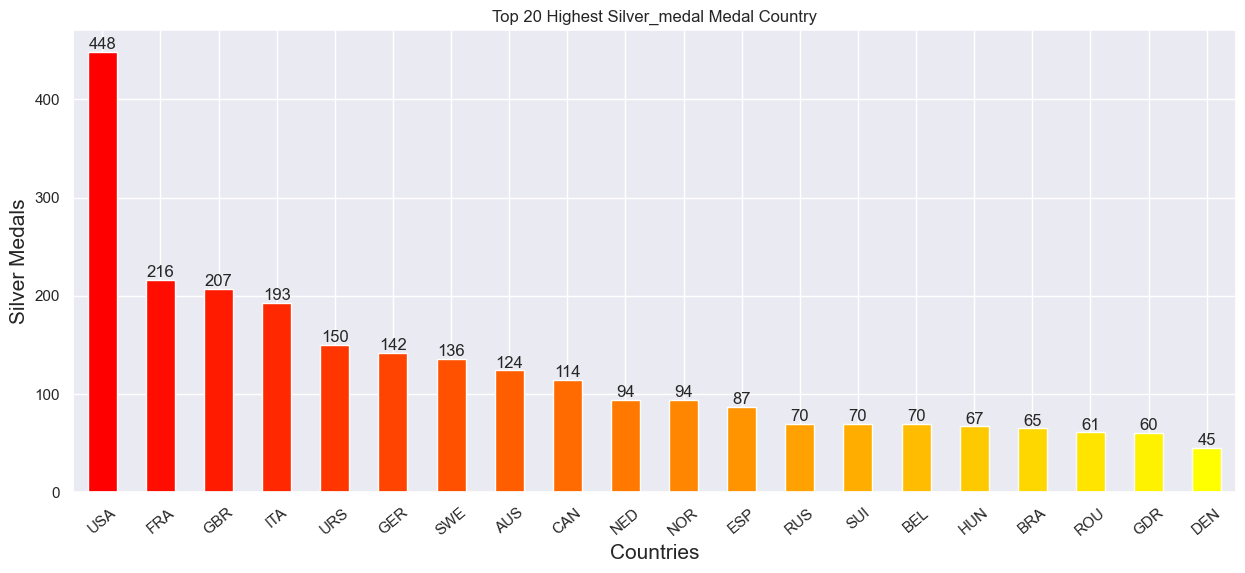

In [30]:
country_silver_medals = df[df["Medal"] == "Silver"]
silver_medal = country_silver_medals.groupby(['NOC'])['Medal'].count().sort_values(ascending=False).head(20)
colors = cm.get_cmap('autumn',len(silver_medal))(np.arange(len(silver_medal)))
ax = silver_medal.plot(kind='bar',color=colors,figsize=(15,6))
for contain in ax.containers:
    ax.bar_label(contain)
ax.set_title("Top 20 Highest Silver_medal Medal Country")
ax.set_xlabel("Countries",fontsize=15)
ax.set_ylabel("Silver Medals",fontsize=15)
plt.xticks(rotation=40)
plt.show()

In [31]:
sport_gender_avg_weight = df.groupby(['Sport','Sex'])['Weight'].mean()
sport_gender_avg_weight

Sport          Sex
Alpine Skiing  F      62.154589
               M      77.725309
Alpinism       F            NaN
               M            NaN
Archery        F      61.023256
                        ...    
Water Polo     M      87.584973
Weightlifting  F      66.189474
               M      79.927852
Wrestling      F      58.169014
               M      77.256240
Name: Weight, Length: 114, dtype: float64

In [32]:
sport_event_count = df.groupby('Sport')['Event'].nunique().sort_values(ascending=False)
sport_event_count

Sport
Athletics     83
Shooting      81
Swimming      54
Cycling       42
Sailing       37
              ..
Polo           1
Roque          1
Rugby          1
Softball       1
Tug-Of-War     1
Name: Event, Length: 65, dtype: int64

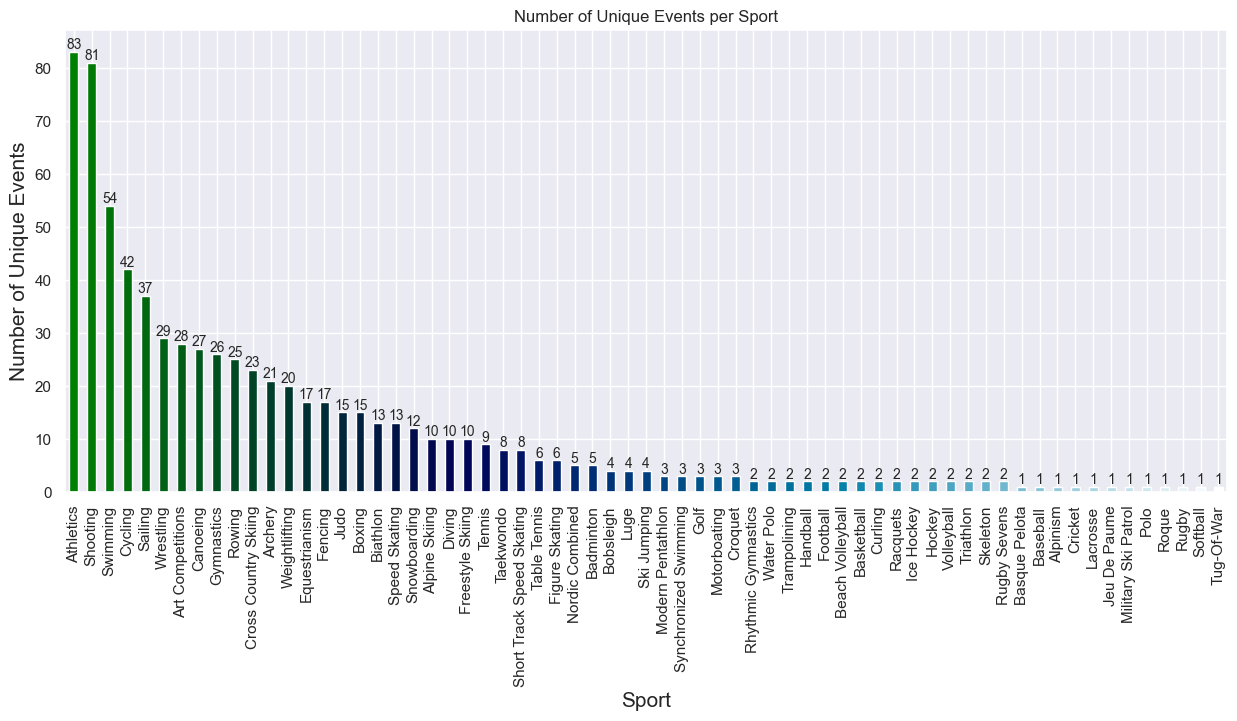

In [33]:
colors = cm.get_cmap('ocean',len(sport_event_count))(np.arange(len(sport_event_count)))
ax = sport_event_count.plot(kind='bar',color=colors,figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
ax.set_title('Number of Unique Events per Sport')
ax.set_xlabel('Sport',fontsize=15)
ax.set_ylabel('Number of Unique Events',fontsize=15)
plt.show()

In [34]:
year_participant_count = df.groupby(['Year'])['ID'].nunique()
year_participant_count.head()

Year
1896     34
1900    433
1904    167
1906    203
1908    578
Name: ID, dtype: int64

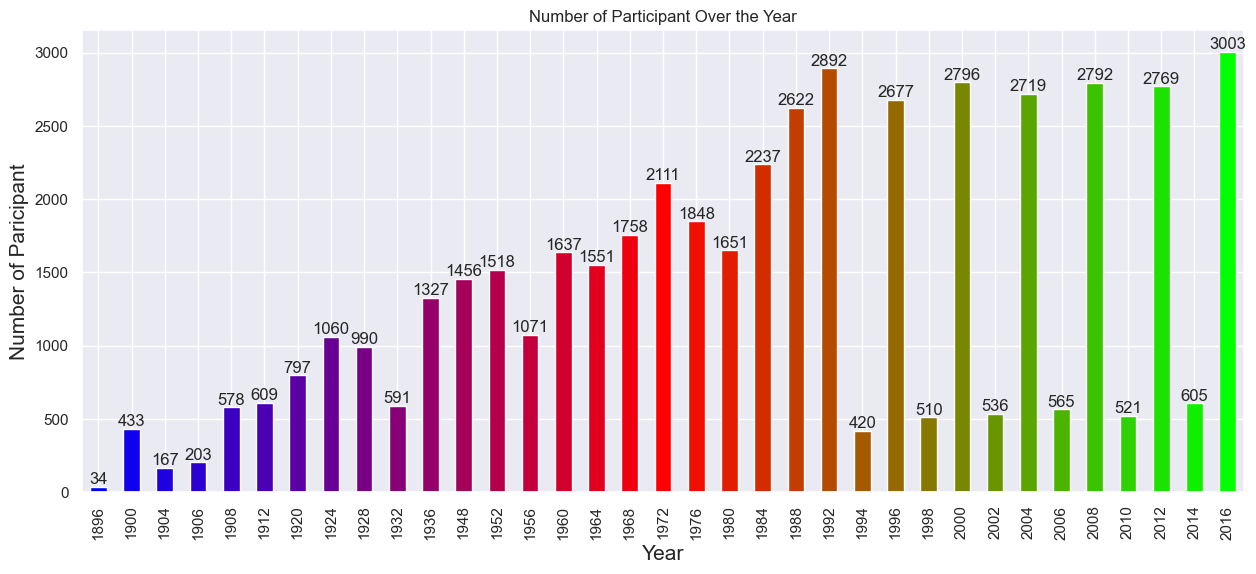

In [35]:
colors = cm.get_cmap('brg',len(year_participant_count))(np.arange(len(year_participant_count)))
ax = year_participant_count.plot(kind='bar',color=colors,figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
ax.set_title('Number of Participant Over the Year')
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Number of Paricipant',fontsize=15)
plt.show()

In [36]:
country_avg_age = df.groupby(['NOC'])['Age'].mean().sort_values(ascending=False).head(10)
country_avg_age

NOC
WIF    34.600000
MON    31.611111
DMA    30.000000
TLS    28.333333
CAY    28.181818
TJK    28.161290
AHO    28.090909
ISV    27.462687
BIH    27.454545
IRL    27.390935
Name: Age, dtype: float64

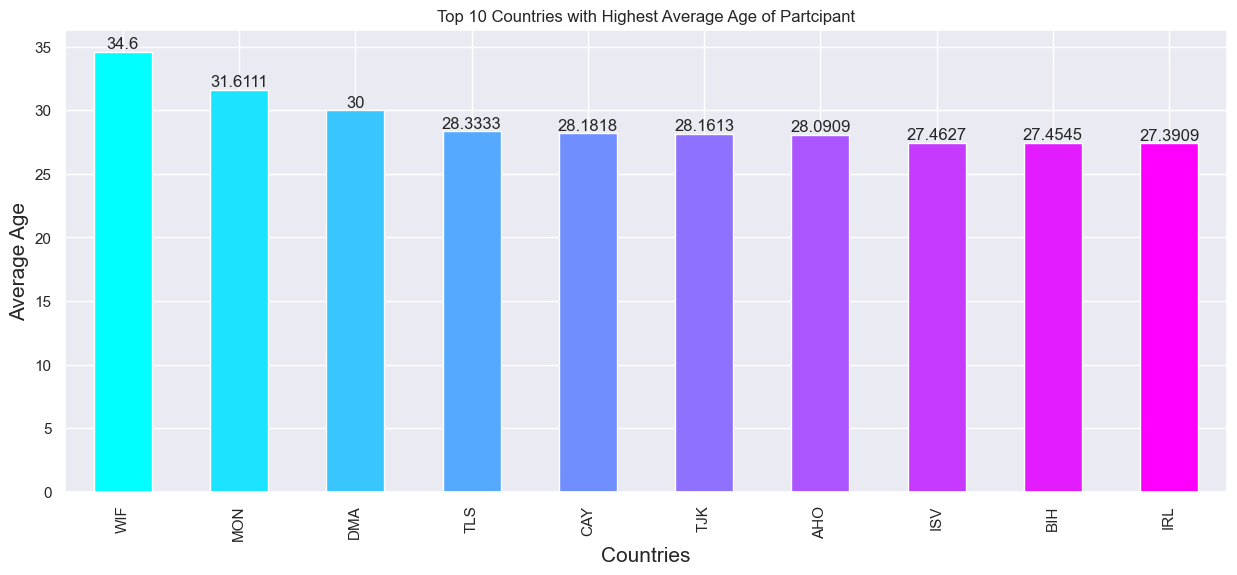

In [37]:
colors = cm.get_cmap('cool',len(country_avg_age))(np.arange(len(country_avg_age)))
ax = country_avg_age.plot(kind='bar',color=colors,figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
ax.set_title('Top 10 Countries with Highest Average Age of Partcipant')
ax.set_xlabel('Countries',fontsize=15)
ax.set_ylabel('Average Age',fontsize=15)
plt.show()

In [38]:
df['Season'].value_counts()

Season
Summer    58084
Winter    11533
Name: count, dtype: int64

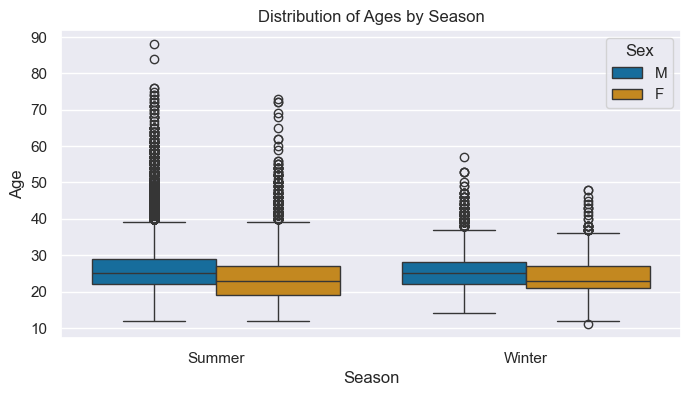

In [39]:
sns.set(style='darkgrid')
sns.boxplot(data=df,x='Season',y='Age',hue='Sex',palette='colorblind')
plt.title("Distribution of Ages by Season")
plt.xlabel("Season")
plt.ylabel("Age")
plt.show()

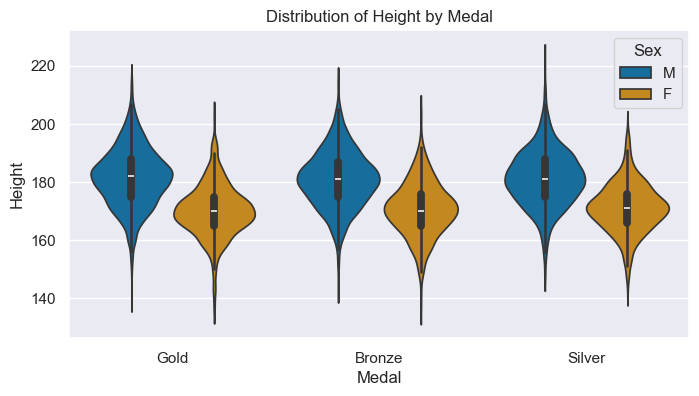

In [40]:
sns.set(style='darkgrid')
sns.violinplot(data=df,x='Medal',y='Height',hue='Sex',palette='colorblind')
plt.title("Distribution of Height by Medal")
plt.xlabel("Medal")
plt.ylabel("Height")
plt.show()

In [41]:
most_medals_counrty = df['NOC'].value_counts().idxmax()
print("Most Medal-Winning Country:",most_medals_counrty)

Most Medal-Winning Country: USA


In [42]:
tallest_athlete = df[df['Height'] == df['Height'].max()]
print("Tallest Athlete:")
print(tallest_athlete[["ID","Name","Height","Sport"]])

Tallest Athlete:
          ID                  Name  Height       Sport
32376  16639  Tommy Loren Burleson   223.0  Basketball


In [43]:
heaviest_athlete = df[df['Weight'] == df['Weight'].max()]
print("Heaviest Athlete:")
print(heaviest_athlete[["ID","Name","Height","Sport"]])

Heaviest Athlete:
          ID               Name  Height Sport
23155  12177  Ricardo Blas, Jr.   183.0  Judo
23156  12177  Ricardo Blas, Jr.   183.0  Judo


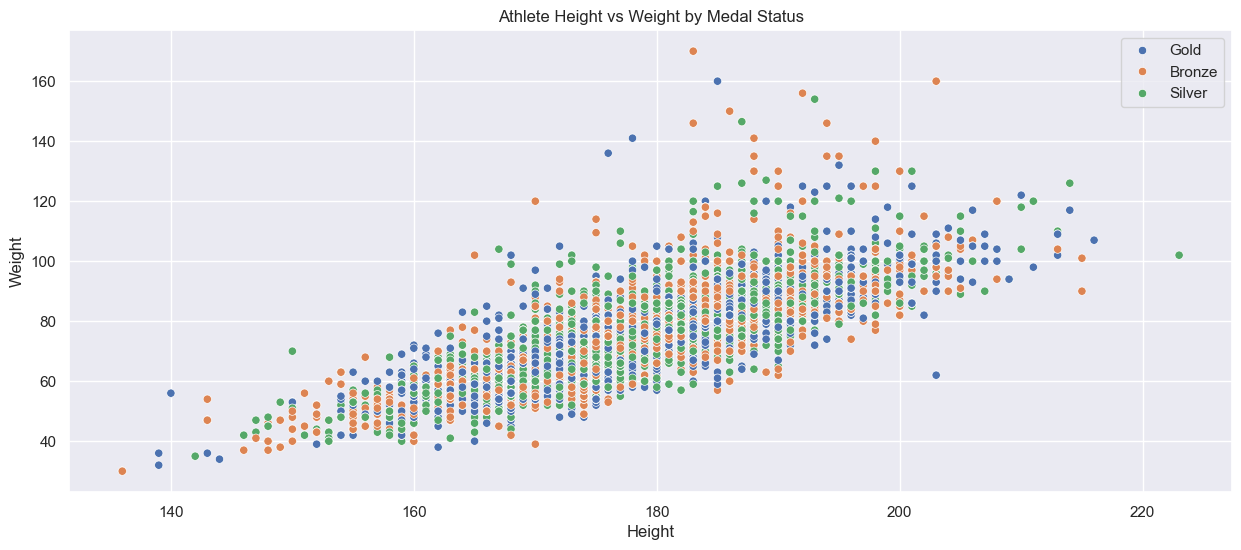

In [44]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x='Height',y='Weight',hue='Medal')
plt.title("Athlete Height vs Weight by Medal Status")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

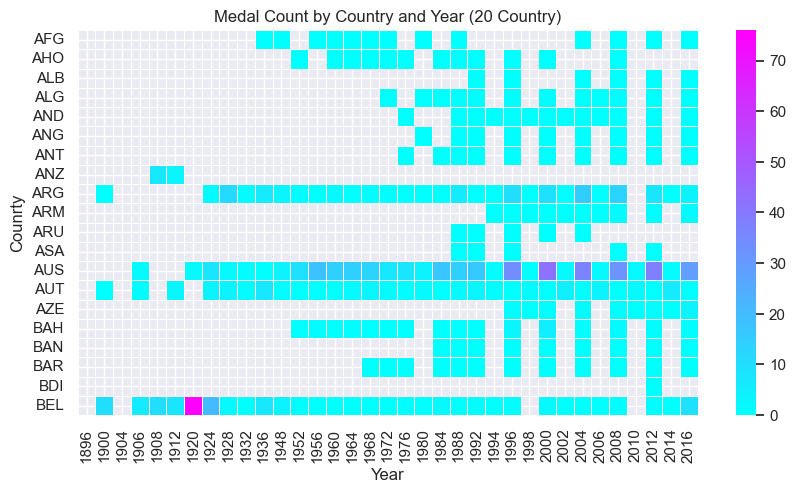

In [45]:
medals_by_country_year = df.pivot_table(index='NOC', columns='Year', values='Medal', aggfunc='count').head(20)
plt.figure(figsize=(10,5))
sns.heatmap(medals_by_country_year,linewidths=0.5,cmap='cool')
plt.title("Medal Count by Country and Year (20 Country)")
plt.xlabel("Year")
plt.ylabel("Counrty")
plt.show()

## Conclusion ...

##### From this analysis, it is clear that a few countries such as the USA, ITA, URS and GBR
##### have consistently dominated medal tallies, while several smaller nations show
##### excellence in specific sports. The data also highlights increasing female participation
##### over the decades, reflecting broader social change.

##### However, some limitations exist due to missing data in early years. A future step could
##### involve applying machine learning models to predict medal counts or analyzing athlete
##### performance across specific sports.